In [131]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

In [132]:
x = smp.symbols('x')

In [133]:
x**2

x**2

In [134]:
smp.sin(x)

sin(x)

In [135]:
y = x**2 + 2*x + 1
y

x**2 + 2*x + 1

In [136]:
for function in dir(smp):
    print(function)
    print(dir(function))

Abs
['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']
AccumBounds
['_

In [137]:
z = y**2
z

(x**2 + 2*x + 1)**2

In [138]:
z.factor()

(x + 1)**4

In [139]:
smp.solve(smp.sin(x),x)

[0, pi]

In [140]:
smp.solve(z,x)

[-1]

In [141]:
x  = smp.symbols('x')
smp.solve(x**2 + 1, x)

[-I, I]

In [142]:
x  = smp.symbols('x', real=True, positive=True)
smp.solve(x + 4, x)

[]

In [143]:
x, y, z = smp.symbols('x y z')
F = x**2 + smp.sin(z)*y
F

x**2 + y*sin(z)

In [144]:
x_sols = smp.solve(F, x)
x_sols

[-sqrt(-y*sin(z)), sqrt(-y*sin(z))]

In [145]:
y_sols = smp.solve(F, y)
y_sols

[-x**2/sin(z)]

In [146]:
z_sols = smp.solve(F, z)
z_sols

[asin(x**2/y) + pi, -asin(x**2/y)]

In [147]:
expr = z_sols[0]
expr

asin(x**2/y) + pi

In [148]:
# lambdify wandelt einen sympy-Ausdruck in eine Funktion um, die numerische Berechnungen durchführen kann.
# Dies ist nützlich, um symbolische Berechnungen in numerische Berechnungen zu überführen.
expr_f = smp.lambdify([x, y], expr)
expr_f(1, 2)

3.6651914291880923

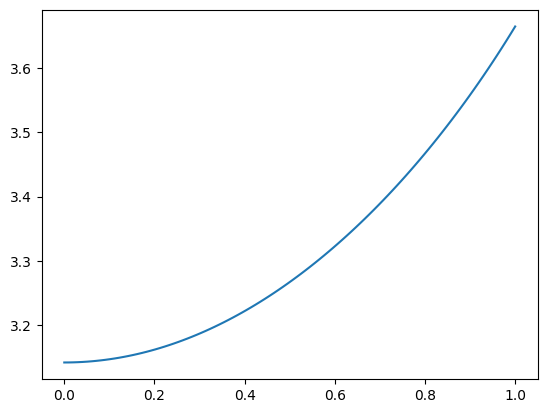

In [149]:
x_num = np.linspace(0, 1, 100)
y_num = 2
plt.plot(x_num, expr_f(x_num, y_num))
plt.show()

In [150]:
F

x**2 + y*sin(z)

In [151]:
F.subs([(y,smp.cos(z)), (z,y)])

x**2 + sin(y)*cos(y)

A falling object encounters a moving platform accelerating upwards:
1. Object $h_o(t)=h_0-v_o t-\frac{1}{2} g t^2$
2. Platform $h_p(t)=v_p t+\frac{1}{2} q t^2$

Find the initial velocity $v_0$ such that when the object and platform collide, they are moving at the same speed.
We need to solve for $v_0$ and $t$ in the two equations
1. $h_0(t)=h_p(t)$
2. $\frac{d h_0}{d t}(t)=-\frac{d h_p}{d t}(t)$

In sympy, need to construct our system of equations as $E Q_1=0, E Q_2=0, \ldots$ In our case, we rewrite them as
1. $h_0(t)-h_p(t)=0$
2. $\frac{d h_0}{d t}+\frac{d h_p}{d t}=0$

In [152]:
t, h0, v0, g, vp, q = smp.symbols('t h_0 v_0 g v_p q', real=True, positive=True)

In [153]:
h0t = h0 - v0*t - smp.Rational(1,2)*g*t**2
h0t

-g*t**2/2 + h_0 - t*v_0

In [154]:
dh0dt = g*t -v0
dh0dt

g*t - v_0

In [155]:
hpt = vp*t + smp.Rational(1,2)*q*t**2
hpt

q*t**2/2 + t*v_p

In [156]:
dhpdt = vp + q*t
dhpdt

q*t + v_p

In [157]:
eq1 = h0t - hpt
eq2 = dh0dt + dhpdt

In [158]:
smp.solve([eq1, eq2], [t, v0])[0]

((-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q),
 v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)

In [159]:
t_collide, v_initfall = smp.solve([eq1, eq2], [t, v0])[0]

In [160]:
v_initfall

v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3

In [161]:
t_collide

(-2*v_p/3 + sqrt(2)*sqrt(3*g*h_0 + 3*h_0*q + 2*v_p**2)/3)/(g + q)

In [162]:
dh0dt = dh0dt.subs([(t, t_collide), (v0, v_initfall)])

In [163]:
dh0dt.simplify()

(-g*v_p - q*v_p/3 - q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

In [166]:
dhpdt = dhpdt.subs([(t, t_collide), (v0, v_initfall)])
dhpdt.simplify()

(g*v_p + q*v_p/3 + q*sqrt(6*g*h_0 + 6*h_0*q + 4*v_p**2)/3)/(g + q)

In [168]:
x = smp.symbols('x')

In [169]:
smp.limit(smp.sin(x/2 + smp.sin(x)), x, smp.pi )

1

In [175]:

eq = ((1 + smp.sin(x)) / ( 1- smp.cos(x)))**2
eq


(sin(x) + 1)**2/(1 - cos(x))**2

In [176]:
smp.diff(eq, x)

2*(sin(x) + 1)*cos(x)/(1 - cos(x))**2 - 2*(sin(x) + 1)**2*sin(x)/(1 - cos(x))**3

In [177]:
f, g = smp.symbols('f g', cls=smp.Function)


In [184]:
f, g = smp.symbols('f g', cls=smp.Function)
g = g(x)
f = f(x+g)

In [185]:
f

f(x + g(x))

In [188]:
dfdx = f.diff(x)
dfdx

(Derivative(g(x), x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + g(x))

In [190]:
dfdx.subs([(g, smp.sin(x))]).doit() # .doit() führt die Ableitung aus

(cos(x) + 1)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x + sin(x))

In [191]:
smp.integrate(smp.csc(x)*smp.cot(x), x)

-1/sin(x)

In [194]:
smp.integrate(smp.exp(x) / smp.sqrt(smp.exp(2*x) + 9), (x, 0, smp.log(4)))

-asinh(1/3) + asinh(4/3)

In [197]:
t = smp.symbols("t")

In [198]:
smp.integrate(x**10*smp.exp(x), (x, 1, t))

(t**10 - 10*t**9 + 90*t**8 - 720*t**7 + 5040*t**6 - 30240*t**5 + 151200*t**4 - 604800*t**3 + 1814400*t**2 - 3628800*t + 3628800)*exp(t) - 1334961*E

Examples
The hydrogen wave function is given by

$$
\begin{gathered}
\psi_{n l m}=R_{n l}(r) Y_l^m(\theta, \phi) \\
R_{n l}(r)=\sqrt{\left(\frac{2}{n a}\right)^3 \frac{(n-l-1)!}{2 n[(n+1)!]}} e^{-r / n a}\left(\frac{2 r}{n a}\right)^l\left[L_{n-l-1}^{2 l+1}(2 r / n a)\right]
\end{gathered}
$$


The mean distance from the nucleus of the electron:

$$
\langle r\rangle=\int R_{n l}^2 r^3 d r
$$


The standard deviation in the distance from the nucleus of the electron:

$$
\sigma=\sqrt{\left\langle r^2\right\rangle-\langle r\rangle^2}=\sqrt{\left(\int_0^{\infty} R_{n l}^2 r^4 d r\right)-\left(\int_0^{\infty} R_{n l}^2 r^3 d r\right)^2}
$$


In [200]:
from sympy import assoc_laguerre
"""
The `assoc_laguerre` function in SymPy is used to compute the associated Laguerre polynomial, which is a solution to the associated Laguerre differential equation. These polynomials are widely used in quantum mechanics, particularly in the radial part of the wavefunctions of the hydrogen atom.

For more information, refer to the SymPy documentation: https://docs.sympy.org/latest/modules/functions/special.html#sympy.functions.special.laguerre.assoc_laguerre
"""


'\nThe `assoc_laguerre` function in SymPy is used to compute the associated Laguerre polynomial, which is a solution to the associated Laguerre differential equation. These polynomials are widely used in quantum mechanics, particularly in the radial part of the wavefunctions of the hydrogen atom.\n\nFor more information, refer to the SymPy documentation: https://docs.sympy.org/latest/modules/functions/special.html#sympy.functions.special.laguerre.assoc_laguerre\n'

In [203]:
r, a = smp.symbols('r a', real=True, positive=True)
n, l = smp.symbols('n l', integer=True, positive=True)

In [205]:
R  = smp.sqrt((2/(n*a))**3 * smp.factorial(n - l - 1) / (2*n*smp.factorial(n + l))) * smp.exp(-r/(n*a)) * (2*r/(n*a))**l * assoc_laguerre(n - l - 1, 2*l + 1, 2*r/(n*a))
R

2*(2*r/(a*n))**l*exp(-r/(a*n))*assoc_laguerre(-l + n - 1, 2*l + 1, 2*r/(a*n))*sqrt(factorial(-l + n - 1))/(a**(3/2)*n**2*sqrt(factorial(l + n)))

In [214]:
def comute_int(n_val, l_val, k):
    R_nl = R.subs([(n, n_val), (l, l_val)])
    return smp.integrate(R_nl**2 * r**k, (r, 0, smp.oo))

In [215]:
comute_int(n_val = 3, l_val = 1, k = 3)

25*a/2

: 